# Exploratory Data Analysis 

In [6]:
from drug_db import *
import pandas as pd

master_df = pd.read_csv("DrugBank_curated_df.csv")

df_cyp_counter = pd.DataFrame([(cyp, count) for cyp, count in cyp_counter.items()], 
                              columns= ["CYP", "DrugCount"]).sort_values("DrugCount", ascending=False)
df_cyp_counter["DrugCount"].describe()


count      33.000000
mean      127.212121
std       215.714910
min         1.000000
25%         2.000000
50%        17.000000
75%       179.000000
max      1051.000000
Name: DrugCount, dtype: float64

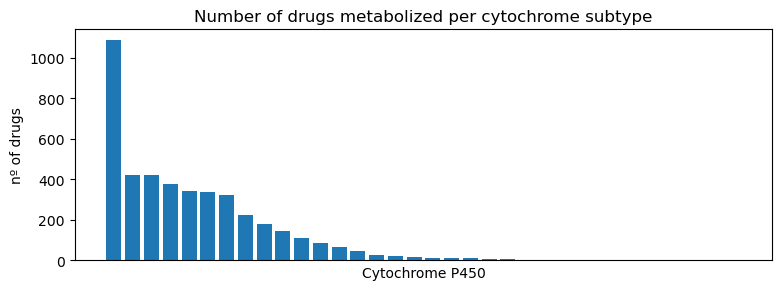

In [5]:
import matplotlib.pyplot as plt

names = df_cyp_counter["CYP"]
values = df_cyp_counter["DrugCount"]

plt.figure(figsize=(9,3))
plt.bar(names, values)
plt.ylabel("nº of drugs")
plt.xlabel("Cytochrome P450")
plt.xticks([])
plt.title("Number of drugs metabolized per cytochrome subtype")
plt.show()

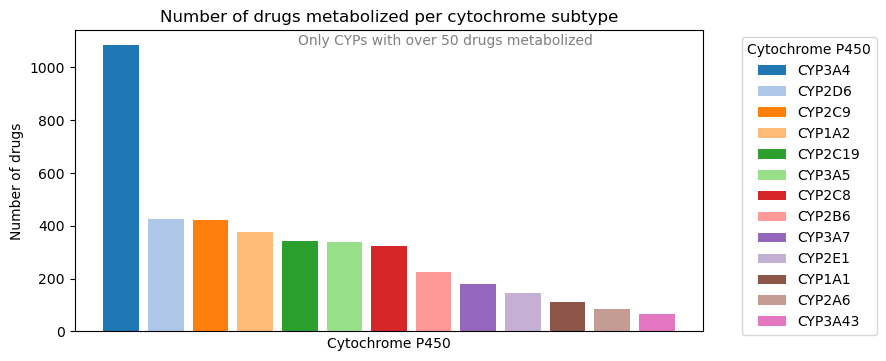

In [6]:
df_cyp_common = df_cyp_counter[df_cyp_counter["DrugCount"] > 50]
common_names = df_cyp_common["CYP"]
common_values = df_cyp_common["DrugCount"]

# Assign a unique color for each bar
colours = plt.cm.tab20.colors  # colormap with 20 distinct colours
bar_colours = [colours[i % len(colours)] for i in range(len(common_names))]

# Plot bars
plt.figure(figsize=(9, 4))
bars = plt.bar(range(len(common_names)), common_values, color=bar_colours)

# Add legend instead of crowded x-axis
plt.legend(bars, common_names, title="Cytochrome P450", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel("Number of drugs")
plt.xlabel("Cytochrome P450")
plt.title("Number of drugs metabolized per cytochrome subtype")
plt.suptitle("Only CYPs with over 50 drugs metabolized", fontsize=10, color="gray", y=0.83)
plt.xticks([])  # remove x-axis labels
plt.tight_layout()  # adjust layout to make room for legend
plt.show()


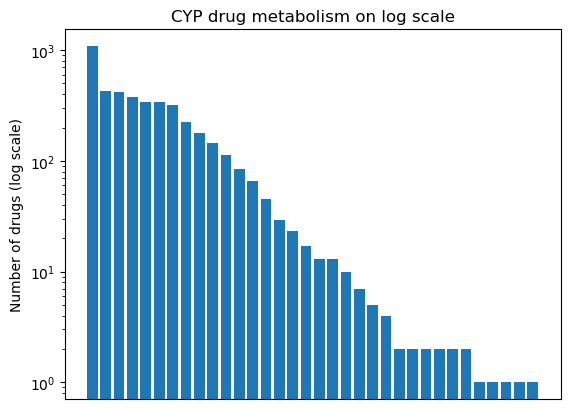

In [7]:
plt.bar(df_cyp_counter["CYP"], df_cyp_counter["DrugCount"])
plt.yscale('log')
plt.xticks([], [])
plt.ylabel("Number of drugs (log scale)")
plt.title("CYP drug metabolism on log scale")
plt.show()

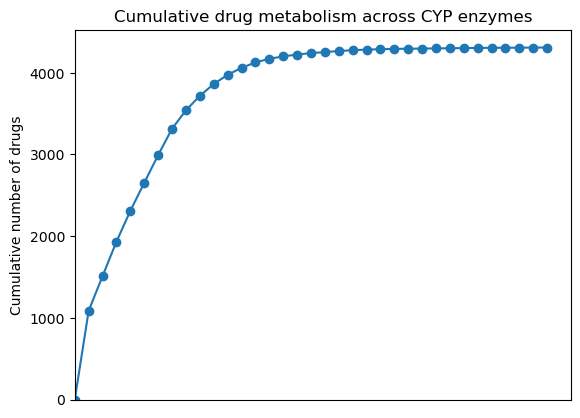

In [65]:
cumulative = df_cyp_counter["DrugCount"].cumsum()
cumulative = pd.concat([pd.Series([0]), cumulative]).reset_index(drop=True)

plt.plot(pd.concat([df_cyp_counter["CYP"], pd.Series([""])]), cumulative, marker='o')
plt.xticks([])
# force axes to start at 0
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylabel("Cumulative number of drugs")
plt.title("Cumulative drug metabolism across CYP enzymes")
plt.show()